In [10]:
from IPython.display import Audio
from scipy.io.wavfile import read, write
from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft
import numpy as np
import matplotlib.pyplot as plt

In [11]:
audio_file = '/home/arshita/Documents/Data Handling and Visualization/2 (1)/test.wav'
noise_audio_file = '/home/arshita/Documents/Data Handling and Visualization/2 (1)/test_noise.wav'
noise_only_file = '/home/arshita/Documents/Data Handling and Visualization/2 (1)/pure_noise.wav'

In [13]:
audio_sample_rate, audio_data = read(audio_file)
audio_length = audio_data.shape[0]/audio_sample_rate # in seconds

noise_audio_sample_rate, noise_audio_data = read(noise_audio_file)
noise_audio_length = noise_audio_data.shape[0]/noise_audio_sample_rate

noise_only_sample_rate, noise_only_data = read(noise_only_file)
noise_only_length = noise_only_data.shape[0]/noise_only_sample_rate

In [32]:
# time domain filter

window_size = 3
def movAvg(Arr, window_size):
    Arr = np.insert(Arr, 0, 0)
    movAvg_Arr = np.zeros(Arr.shape[0]-window_size)
    winSum = 0
    for i in range(1, Arr.shape[0]):
        winSum += Arr[i]
        if i >= window_size:
            winSum -= Arr[i-window_size]
            movAvg_Arr[i-window_size] = winSum
    return movAvg_Arr 

In [33]:
tf_ns = movAvg(noise_audio_data, 1)

In [34]:
tf_ns.shape

(64000,)

In [35]:
Audio(noise_audio_data, rate=audio_sample_rate)

In [40]:
# movAvg(audio_data, 3).shape

Audio(movAvg(noise_audio_data, 10), rate=audio_sample_rate)

In [46]:
audio_data.shape

(64000,)

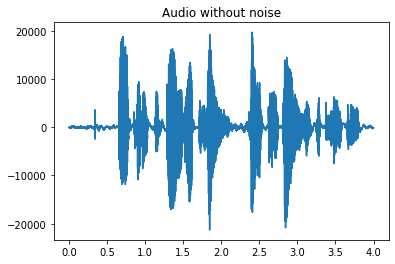

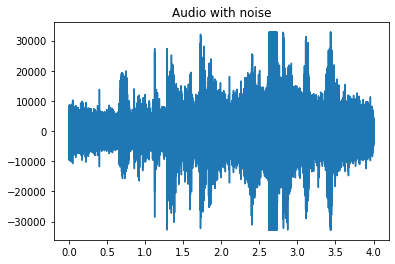

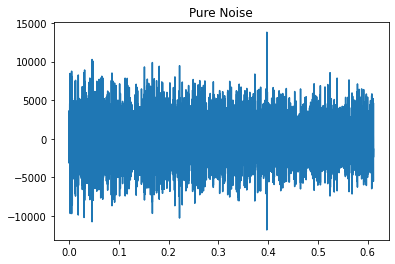

In [4]:
plt.plot(np.linspace(0, audio_length, audio_data.shape[0]), audio_data)
plt.title("Audio without noise")
plt.show()

plt.plot(np.linspace(0, noise_audio_length, noise_audio_data.shape[0]), noise_audio_data)
plt.title("Audio with noise")
plt.show()

plt.plot(np.linspace(0, noise_only_length, noise_only_data.shape[0]), noise_only_data)
plt.title("Pure Noise")
plt.show()

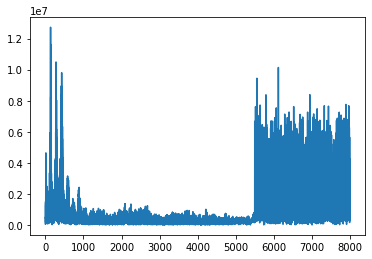

In [5]:
'''Frequency domain graph of noise added audio'''
# Number of samples in normalized_tone
N = noise_audio_data.shape[0]

noise_yf = rfft(noise_audio_data)
xf = rfftfreq(N, 1 / noise_audio_sample_rate)

plt.plot(xf, np.abs(noise_yf))
plt.show()

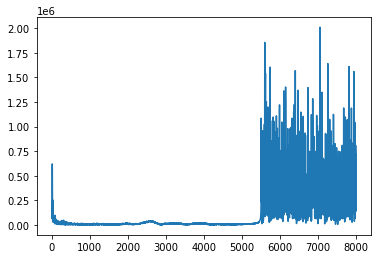

In [6]:
'''Frequency domain graph of noise added audio'''
# Number of samples in normalized_tone
N = noise_only_data.shape[0]

noise_only_yf = rfft(noise_only_data)
xf = rfftfreq(N, 1 / noise_only_sample_rate)

plt.plot(xf, np.abs(noise_only_yf))
plt.show()

In [13]:
mean_noise = np.mean(np.abs(noise_only_yf))

In [14]:
mean_noise

133973.42756270888

In [16]:
import librosa
nw, nsr = librosa.load( noise_only_file, sr=None, mono=True)
ns= librosa.stft(nw) 
nss= np.abs(ns)
mns= np.mean(nss, axis=1) # get mean

In [27]:
mns.reshape((mns.shape[0],1)).shape

(1025, 1)

In [28]:
mns.shape

(1025,)

In [ ]:
import numpy as np
import scipy
import librosa

# edit following wav file name
infile='/home/arshita/Documents/Data Handling and Visualization/2 (1)/test_noise.wav'
outfile='/home/arshita/Documents/Data Handling and Visualization/2 (1)/output_short.wav'
noisefile='/home/arshita/Documents/Data Handling and Visualization/2 (1)/pure_noise.wav'

# load input file, and stft (Short-time Fourier transform)
print ('load wav', infile)
w, sr = librosa.load( infile, sr=None, mono=True) # keep native sr (sampling rate) and trans into mono
s= librosa.stft(w)    # Short-time Fourier transform
ss= np.abs(s)         # get magnitude
angle= np.angle(s)    # get phase
b=np.exp(1.0j* angle) # use this phase information when Inverse Transform

# load noise only file, stft, and get mean
print ('load wav', noisefile)
nw, nsr = librosa.load( noisefile, sr=None, mono=True)
ns= librosa.stft(nw) 
nss= np.abs(ns)
mns= np.mean(nss, axis=1) # get mean

# subtract noise spectral mean from input spectral, and istft (Inverse Short-Time Fourier Transform)
sa= ss - mns.reshape((mns.shape[0],1))  # reshape for broadcast to subtract
sa0= sa * b  # apply phase information
y= librosa.istft(sa0) # back to time domain signal

# save as a wav file
scipy.io.wavfile.write(outfile, sr, (y * 32768).astype(np.int16)) # save signed 16-bit WAV format
#librosa.output.write_wav(outfile, y , sr)  # save 32-bit floating-point WAV format, due to y is float 
print ('/home/arshita/Documents/Data Handling and Visualization/2 (1)/spectral_sub_write wav', outfile)